In [1]:
import pandas as pd
import numpy as np

In [6]:
# Load the dataset
df = pd.read_csv('/content/crop_yield.csv')

In [7]:
df.duplicated().sum()


0

In [8]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [9]:
df.tail()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159
999999,West,Sandy,Maize,180.936180,27.298847,True,False,Sunny,76,2.937243


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [11]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [12]:
df.dtypes

,0
Region,object
Soil_Type,object
Crop,object
Rainfall_mm,float64
Temperature_Celsius,float64
Fertilizer_Used,bool
Irrigation_Used,bool
Weather_Condition,object
Days_to_Harvest,int64
Yield_tons_per_hectare,float64


In [13]:
df.shape

(1000000, 10)

In [14]:
df.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_mm,1000000.0,549.981901,259.851320,100.000896,324.891090,550.124061,774.738520,999.998098
Temperature_Celsius,1000000.0,27.504965,7.220608,15.000034,21.254502,27.507365,33.753267,39.999997
Days_to_Harvest,1000000.0,104.495025,25.953412,60.000000,82.000000,104.000000,127.000000,149.000000
Yield_tons_per_hectare,1000000.0,4.649472,1.696572,-1.147613,3.417637,4.651808,5.879200,9.963372


In [16]:
df['Crop'].value_counts()

,count
Crop,
Maize,166824
Rice,166792
Barley,166777
Wheat,166673
Cotton,166585
Soybean,166349


###Feature Understanding

Histogram

Pie

Scatter

Boxplot

KDE

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

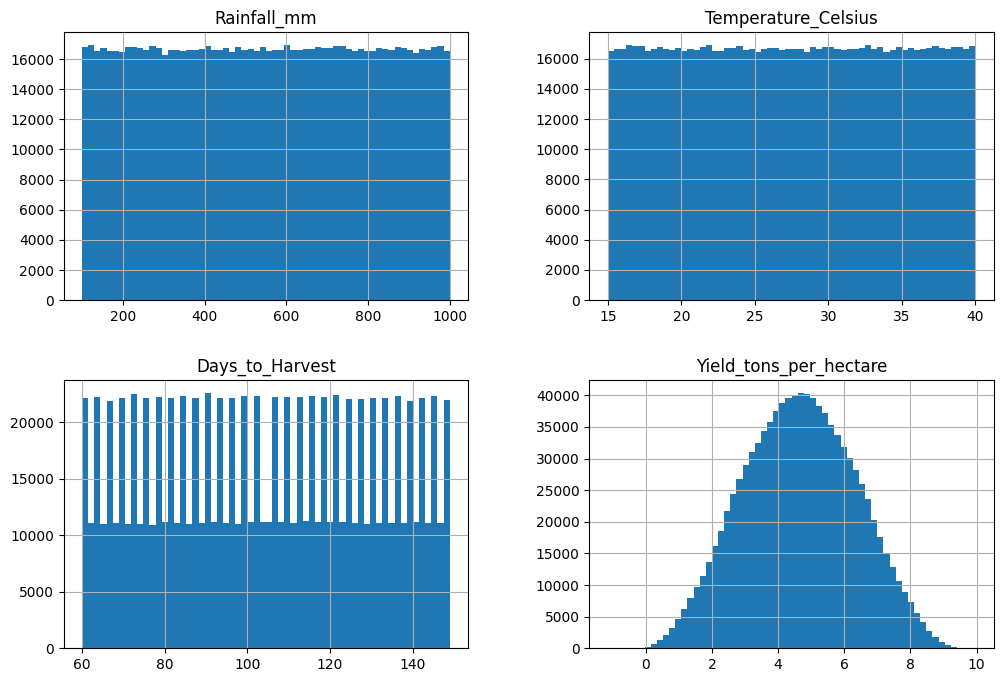

In [18]:
df.hist(bins=60, figsize =(12,8))
plt.show()

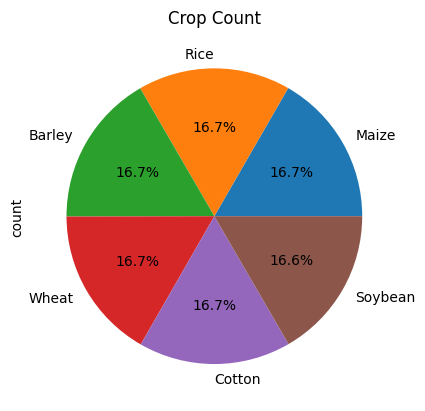

In [19]:
ax = df['Crop'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Crop Count')

plt.show()

In [20]:
df.corr(numeric_only=True)

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare
Rainfall_mm,1.000000,-0.000123,-0.001076,-0.000568,-0.002669,0.764618
Temperature_Celsius,-0.000123,1.000000,0.002343,-0.000484,-0.000731,0.085565
Fertilizer_Used,-0.001076,0.002343,1.000000,0.001510,-0.001029,0.442099
Irrigation_Used,-0.000568,-0.000484,0.001510,1.000000,-0.001234,0.353741
Days_to_Harvest,-0.002669,-0.000731,-0.001029,-0.001234,1.000000,-0.002591
Yield_tons_per_hectare,0.764618,0.085565,0.442099,0.353741,-0.002591,1.000000


<Axes: >

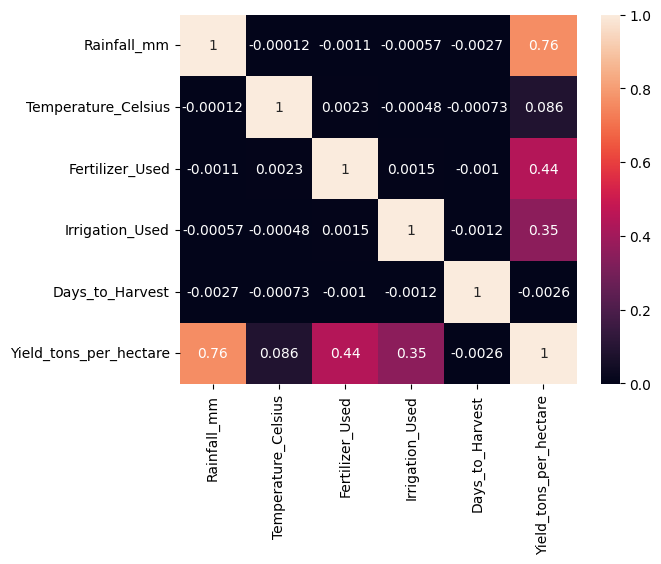

In [21]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

The correlation matrix shows that Rainfall_mm has the highest positive correlation with Yield_tons_per_hectare.

Scatter plots help check if the relationship is linear or non-linear.

Since Rainfall has the strongest impact, it is the best feature to visualize with Yield first.



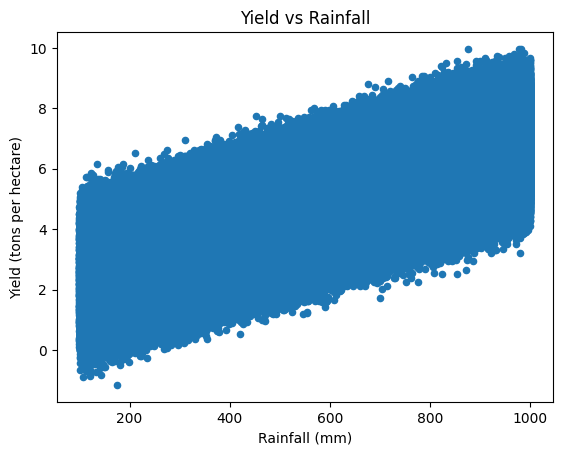

In [22]:
bx = df.plot.scatter(x='Rainfall_mm', y='Yield_tons_per_hectare', title='Yield vs Rainfall')
bx.set_xlabel('Rainfall (mm)')
bx.set_ylabel('Yield (tons per hectare)')

plt.show()

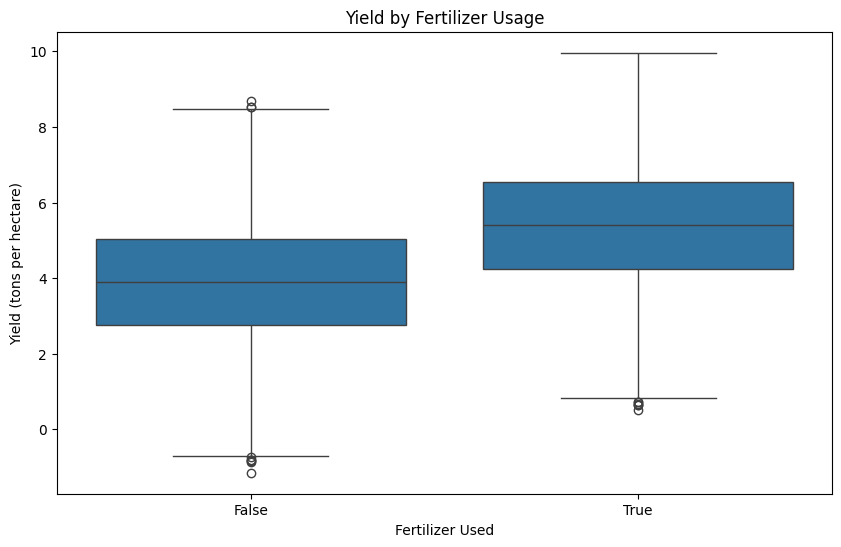

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', data=df)
ax.set_title('Yield by Fertilizer Usage')
ax.set_xlabel('Fertilizer Used')
ax.set_ylabel('Yield (tons per hectare)')

plt.show()

In [24]:
# Group data by 'Fertilizer_Used'
groups = df.groupby('Fertilizer_Used')

outliers_count = {}

for Fertilizer, group in groups:
    Q1 = group['Yield_tons_per_hectare'].quantile(0.25)
    Q3 = group['Yield_tons_per_hectare'].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = group[(group['Yield_tons_per_hectare'] < lower_bound) | (group['Yield_tons_per_hectare'] > upper_bound)]

    # Store the count of outliers for each group
    outliers_count[Fertilizer] = outliers.shape[0]


for Fertilizer, count in outliers_count.items():
    print(f"Outliers in Fertilizer_Used = {Fertilizer}: {count} ")

Outliers in Fertilizer_Used = False: 9 
Outliers in Fertilizer_Used = True: 6 


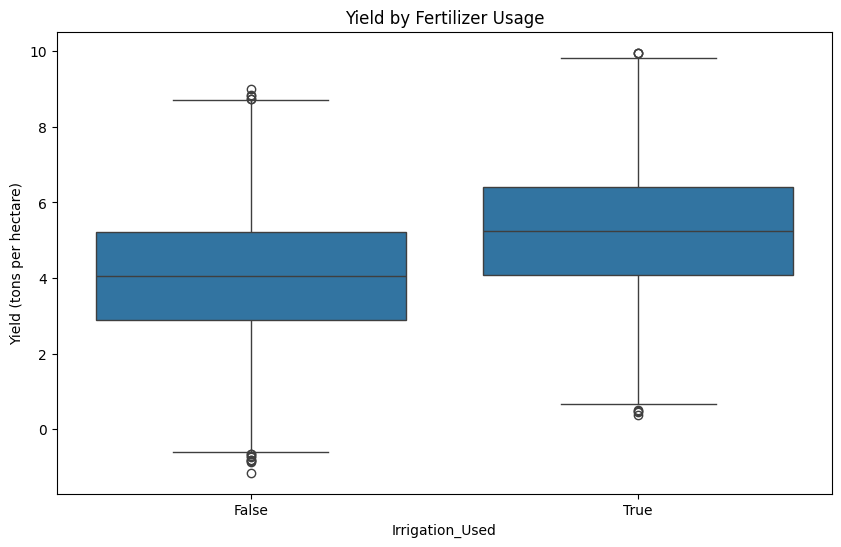

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Irrigation_Used', y='Yield_tons_per_hectare', data=df)
ax.set_title('Yield by Fertilizer Usage')
ax.set_xlabel('Irrigation_Used')
ax.set_ylabel('Yield (tons per hectare)')

plt.show()

In [26]:
# Group data by 'Irrigation_Used'
groups = df.groupby('Irrigation_Used')

outliers_count = {}


for irrigation, group in groups:

    Q1 = group['Yield_tons_per_hectare'].quantile(0.25)
    Q3 = group['Yield_tons_per_hectare'].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = group[(group['Yield_tons_per_hectare'] < lower_bound) | (group['Yield_tons_per_hectare'] > upper_bound)]

    # Store the count of outliers for each group
    outliers_count[irrigation] = outliers.shape[0]

for irrigation, count in outliers_count.items():
    print(f"Outliers in Irrigation_Used = {irrigation}: {count} ")

Outliers in Irrigation_Used = False: 14 
Outliers in Irrigation_Used = True: 7 


 Z-score > 3 or Z-score < -3 indicates that the data point is far from the mean and likely an outlier.

In [27]:

# List of numerical columns
num_cols = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest", "Yield_tons_per_hectare"]

# Set Z-score threshold
threshold = 3

# Find and count outliers using Z-score
outliers = {}

for col in num_cols:
    if col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        z_scores = np.abs((df[col] - mean) / std)
        # Find rows where |Z| > 3 (outliers)
        outliers[col] = df[z_scores > threshold]



In [28]:

# Print number of outliers for each column
for col, outlier_data in outliers.items():
    print(f"\nOutliers in {col}: {outlier_data.shape[0]} ")


Outliers in Rainfall_mm: 0 

Outliers in Temperature_Celsius: 0 

Outliers in Days_to_Harvest: 0 

Outliers in Yield_tons_per_hectare: 37 


In [29]:
df = df[z_scores <= threshold]

In [30]:
df.shape

(999963, 10)

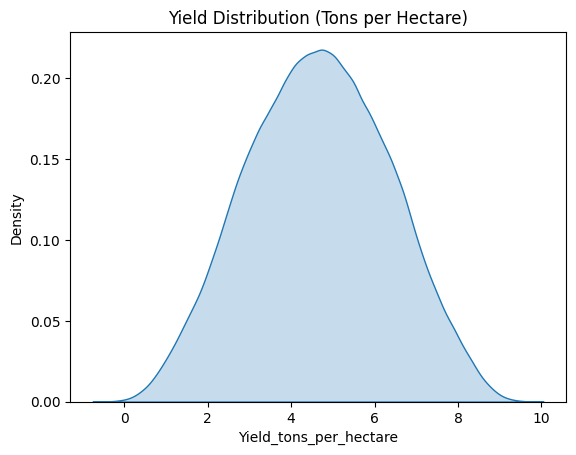

In [31]:
sns.kdeplot(df['Yield_tons_per_hectare'], fill=True)
plt.title('Yield Distribution (Tons per Hectare)')
plt.show()

In [32]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


###Data Preprocessing

In [33]:
X = df.drop('Yield_tons_per_hectare',axis=1)
y = df.loc[:,'Yield_tons_per_hectare']

In [34]:
X.shape,y.shape

((999963, 9), (999963,))

###Encoding the categorical data

Most ML algorithms handle Boolean values as 0 and 1 internally ,so there is no need to do encoding for boolean column

In [35]:
# label_map = {'Fertilizer_Used': {False: 0, True: 1}, 'Irrigation_Used': {False: 0, True: 1}}
# X.replace(label_map, inplace=True)
# X.head()

If using tree-based models (Random Forest, XGBoost), multicollinearity is not a problem, so you can keep all categories,so drop_first=False

But The dummy variable trap happens when all categories of a categorical variable are included in a regression model, creating perfect multicollinearity
so drop_first=True

In [36]:
X_ohe= pd.get_dummies(X,columns=['Region','Soil_Type','Crop','Weather_Condition'],drop_first=True)

In [37]:
X_ohe.shape

(999963, 20)

In [38]:
X_ohe.head(5)

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False
1,992.673282,18.026142,True,True,140,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,986.866331,16.644190,False,True,146,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False
4,730.379174,31.620687,True,True,110,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False


In [39]:
X_ohe.dtypes

,0
Rainfall_mm,float64
Temperature_Celsius,float64
Fertilizer_Used,bool
Irrigation_Used,bool
Days_to_Harvest,int64
Region_North,bool
Region_South,bool
Region_West,bool
Soil_Type_Clay,bool
Soil_Type_Loam,bool


**Splitting** the dataset into the Training set and Test set

In [40]:
#x_ohe_std = (X - X.mean()) / X.std()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2, random_state = 42)

In [42]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((799970, 20), (799970,), (199993, 20), (199993,))

###We are planning to apply

Linear Regression

Random Forest

Gradient Boosting
  
**Neural** Networks



###Linear Regression

Linear Regression is one of the simplest and most widely used machine learning algorithms for regression tasks. It is used to model the relationship between a dependent (target) variable and one or more independent (predictor) variables by fitting a linear equation to observed data


In [ ]:
from sklearn.metrics import mean_absolute_error,\
mean_squared_error, r2_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

for d in range(1, 3):  # Try different degrees
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    print(f"Degree {d}, Mean R²: {scores.mean()}")



Degree 1, Mean R²: 0.9130113733953353
Degree 2, Mean R²: 0.9129567457677419


In [ ]:
best_degree = 2
lr = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression())
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)


In [ ]:
test_mae=mean_absolute_error( y_test, y_test_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_test_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_test_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.39937851152083864
Testing MSE: 0.2500323587775367
Testing R²: 0.9130101103054895


###Ridge

Ridge Regression is a type of linear regression that includes L2 regularization to address multicollinearity and prevent overfitting by adding a penalty to the size of the coefficients. It is particularly useful when the model has many features or the dataset is highly prone to overfitting.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid={
    "alpha" : [0.01,0.1,0.2],
    "max_iter" : [20, 50, 2000]
}
gscv = GridSearchCV(Ridge(random_state=7), param_grid, cv=2, verbose=2)
gscv.fit(X_train,y_train)
print(gscv.best_score_)
print(gscv.best_params_)



Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.1s
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.1s
[CV] END ............................alpha=0.01, max_iter=50; total time=   0.1s
[CV] END ............................alpha=0.01, max_iter=50; total time=   0.1s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.1s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.1s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.1s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.1s
[CV] END .............................alpha=0.1, max_iter=50; total time=   0.1s
[CV] END .............................alpha=0.1, max_iter=50; total time=   0.1s
[CV] END ...........................alpha=0.1, max_iter=2000; total time=   0.1s
[CV] END ...........................alpha=0.1, ma

create best ridge model

In [ ]:

best_degree = 2
ridge = make_pipeline(PolynomialFeatures(degree=best_degree),Ridge(alpha= 0.2 , max_iter = 20, random_state = 7))
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.6382e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.39937861180054546
Testing MSE: 0.25003246007861213
Testing R²: 0.9130100750613739


###Lasso

The Lasso (Least Absolute Shrinkage and Selection Operator) regression model is a type of linear regression that applies L1 regularization

Lasso adds a penalty to the linear regression cost function, which is the sum of squared residuals (errors) between predicted and actual values. The penalty is proportional to the absolute value of the coefficients, and it shrinks the less important feature coefficients to zero, effectively removing some features from the model

In [ ]:
from sklearn.linear_model import Lasso
gscv = GridSearchCV(Lasso(random_state=7), param_grid, cv=2, verbose=2)
gscv.fit(X_train,y_train)
print(gscv.best_score_)
print(gscv.best_params_)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.1s
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.2s
[CV] END ............................alpha=0.01, max_iter=50; total time=   0.2s
[CV] END ............................alpha=0.01, max_iter=50; total time=   0.2s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.2s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.2s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.2s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.2s
[CV] END .............................alpha=0.1, max_iter=50; total time=   0.2s
[CV] END .............................alpha=0.1, max_iter=50; total time=   0.2s
[CV] END ...........................alpha=0.1, max_iter=2000; total time=   0.2s
[CV] END ...........................alpha=0.1, ma

In [ ]:
best_degree = 2
lasso = make_pipeline(PolynomialFeatures(degree=best_degree),Lasso(alpha= 0.01 , max_iter = 20, random_state = 7))
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.457e+04, tolerance: 6.978e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.4066195849136922
Testing MSE: 0.2590321633317759
Testing R²: 0.9098789475661019


###Ensemble Technique

###Random Forest

Random Forest Regressor, which is an ensemble learning method based on multiple decision trees.
The algorithm combines several decision trees to improve prediction accuracy and reduce overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=100,  # Reduce trees if needed for performance
    max_depth=15,  # Limit depth to avoid overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1  # Use all available processors
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      n_jobs=-1, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
mae=mean_absolute_error( y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.4051
MSE: 0.2570
R² Score: 0.9106


###Gradient Boosting

Gradient Boosting is a method that combines multiple simple models to create a stronger one. Each new model learns from the mistakes of the previous ones, improving accuracy step by step. This process helps make better predictions over time.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(
    n_estimators=200,  # Number of trees
    learning_rate=0.05,  # Step size
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,  # Use 80% of data per tree
    random_state=42
)

gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=5,
                          min_samples_split=10, n_estimators=200,
                          random_state=42, subsample=0.8)

In [ ]:
y_pred = gb_model.predict(X_test)
mae=mean_absolute_error( y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.3997
MSE: 0.2505
R² Score: 0.9128


###Neural Networks

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
n_features = X_train.shape[1]
n_features

20

In [ ]:
# define model
model1 = Sequential()
model1.add(Dense(5, activation='relu', input_shape=(n_features,)))
model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
# model1.add(Dropout(0.2))
model1.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 806 (3.15 KB)

 Trainable params: 806 (3.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer='adam',loss="mse", metrics=['mae'])

In [ ]:
# fit the model (training)
history = model1.fit( X_train, y_train, epochs=100, batch_size=64,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
2653/2653 - 9s - 3ms/step - loss: 5.5546 - mae: 1.1335 - val_loss: 1.2527 - val_mae: 0.9143
Epoch 2/100
2653/2653 - 9s - 3ms/step - loss: 1.2700 - mae: 0.9201 - val_loss: 2.1280 - val_mae: 1.1910
Epoch 3/100
2653/2653 - 11s - 4ms/step - loss: 1.2194 - mae: 0.9004 - val_loss: 1.9292 - val_mae: 1.1343
Epoch 4/100
2653/2653 - 10s - 4ms/step - loss: 0.3820 - mae: 0.4827 - val_loss: 0.2698 - val_mae: 0.4146
Epoch 5/100
2653/2653 - 7s - 3ms/step - loss: 0.2713 - mae: 0.4154 - val_loss: 0.2632 - val_mae: 0.4090
Epoch 6/100
2653/2653 - 7s - 3ms/step - loss: 0.2622 - mae: 0.4084 - val_loss: 0.2590 - val_mae: 0.4058
Epoch 7/100
2653/2653 - 8s - 3ms/step - loss: 0.2590 - mae: 0.4058 - val_loss: 0.2554 - val_mae: 0.4032
Epoch 8/100
2653/2653 - 9s - 4ms/step - loss: 0.2575 - mae: 0.4046 - val_loss: 0.2524 - val_mae: 0.4006
Epoch 9/100
2653/2653 - 8s - 3ms/step - loss: 0.2564 - mae: 0.4038 - val_loss: 0.2526 - val_mae: 0.4007
Epoch 10/100
2653/2653 - 9s - 3ms/step - loss: 0.2563 - mae: 0

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.4f' % mae)

Test mae: 0.3992


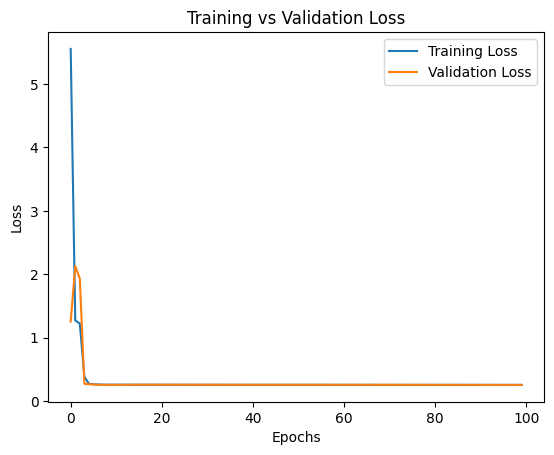

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')  # Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation Loss
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [ ]:
y_pred = model1.predict(X_test)

1895/1895 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.39921957166946537
Testing MSE: 0.24989251564126194
Testing R²: 0.9130587637640201


###Dropout Layer

In [ ]:
model1 = Sequential()
model1.add(Dense(5, activation='relu', input_shape=(n_features,)))
model1.add(Dense(100, activation='relu'))
#model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model1.compile(optimizer='Adam',loss="mse", metrics=['mae'])

In [ ]:
# fit the model (training)
#from tensorflow.keras.callbacks import EarlyStopping

#early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model1.fit(X_train, y_train, epochs=100, batch_size=64,
                     validation_split=0.3, verbose=2, shuffle=False
                    )

Epoch 1/100
2653/2653 - 10s - 4ms/step - loss: 20.2199 - mae: 2.2529 - val_loss: 0.9531 - val_mae: 0.7939
Epoch 2/100
2653/2653 - 9s - 3ms/step - loss: 0.6668 - mae: 0.6417 - val_loss: 0.3100 - val_mae: 0.4439
Epoch 3/100
2653/2653 - 8s - 3ms/step - loss: 0.4263 - mae: 0.5167 - val_loss: 0.3054 - val_mae: 0.4409
Epoch 4/100
2653/2653 - 11s - 4ms/step - loss: 0.3928 - mae: 0.4959 - val_loss: 0.2636 - val_mae: 0.4093
Epoch 5/100
2653/2653 - 7s - 3ms/step - loss: 0.3757 - mae: 0.4858 - val_loss: 0.2877 - val_mae: 0.4277
Epoch 6/100
2653/2653 - 10s - 4ms/step - loss: 0.3628 - mae: 0.4771 - val_loss: 0.3594 - val_mae: 0.4801
Epoch 7/100
2653/2653 - 10s - 4ms/step - loss: 0.3503 - mae: 0.4697 - val_loss: 0.3063 - val_mae: 0.4417
Epoch 8/100
2653/2653 - 8s - 3ms/step - loss: 0.3413 - mae: 0.4636 - val_loss: 0.2719 - val_mae: 0.4157
Epoch 9/100
2653/2653 - 9s - 3ms/step - loss: 0.3359 - mae: 0.4604 - val_loss: 0.3113 - val_mae: 0.4454
Epoch 10/100
2653/2653 - 11s - 4ms/step - loss: 0.3271 - ma

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.3f' % mae)

Test mae: 0.402


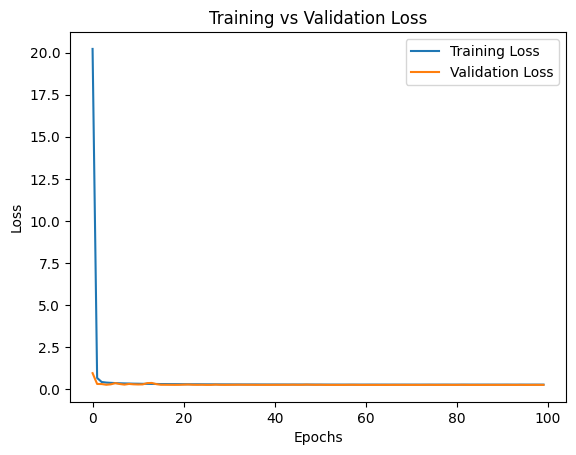

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')  # Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation Loss
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [ ]:
y_pred = model1.predict(X_test)

1895/1895 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.4021523504431545
Testing MSE: 0.2536983247321487
Testing R²: 0.9117346674965079


###Batch Normalization layer

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model1 = Sequential()
model1.add(Dense(5, activation='relu', input_shape=(n_features,)))
model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer='adam',loss="mse", metrics=['mae'])

In [ ]:
# fit the model (training)
history = model1.fit( X_train, y_train, epochs=100, batch_size=64,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
2653/2653 - 11s - 4ms/step - loss: 1.1118 - mae: 0.6654 - val_loss: 0.6957 - val_mae: 0.6825
Epoch 2/100
2653/2653 - 8s - 3ms/step - loss: 0.3206 - mae: 0.4510 - val_loss: 0.5874 - val_mae: 0.6225
Epoch 3/100
2653/2653 - 11s - 4ms/step - loss: 0.3203 - mae: 0.4509 - val_loss: 0.3507 - val_mae: 0.4743
Epoch 4/100
2653/2653 - 9s - 4ms/step - loss: 0.3201 - mae: 0.4507 - val_loss: 0.3599 - val_mae: 0.4806
Epoch 5/100
2653/2653 - 11s - 4ms/step - loss: 0.3196 - mae: 0.4503 - val_loss: 0.4937 - val_mae: 0.5663
Epoch 6/100
2653/2653 - 11s - 4ms/step - loss: 0.3183 - mae: 0.4494 - val_loss: 0.5632 - val_mae: 0.6102
Epoch 7/100
2653/2653 - 10s - 4ms/step - loss: 0.3170 - mae: 0.4485 - val_loss: 0.6413 - val_mae: 0.6555
Epoch 8/100
2653/2653 - 9s - 3ms/step - loss: 0.3161 - mae: 0.4479 - val_loss: 0.6112 - val_mae: 0.6393
Epoch 9/100
2653/2653 - 9s - 3ms/step - loss: 0.3151 - mae: 0.4472 - val_loss: 0.5622 - val_mae: 0.6116
Epoch 10/100
2653/2653 - 10s - 4ms/step - loss: 0.3140 - ma

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.3f' % mae)

Test mae: 0.401


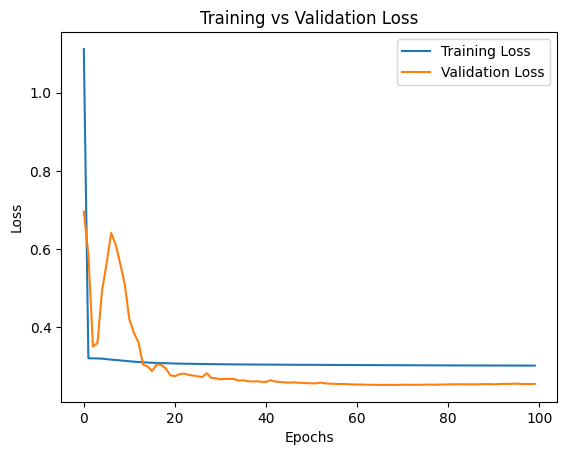

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')  # Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation Loss
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [ ]:
y_pred = model1.predict(X_test)

1895/1895 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.4011100710573215
Testing MSE: 0.25247691504965686
Testing R²: 0.9121596136677605


###L1 & L2 regularization

In [ ]:
from tensorflow.keras import regularizers
model1 = Sequential()
model1.add(Dense(5,  kernel_regularizer=regularizers.L1L2(),
                 activation='relu', input_shape=(n_features,)))
model1.add(Dense(100, activation='relu'))
#model1.add(Dense(400, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
model1.compile(optimizer=Adam(learning_rate=0.001),loss="mse", metrics=['mae'])

In [ ]:
# fit the model (training)
history = model1.fit( X_train, y_train, epochs=100, batch_size=64,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
2653/2653 - 9s - 3ms/step - loss: 6.7443 - mae: 1.1151 - val_loss: 0.8986 - val_mae: 0.7729
Epoch 2/100
2653/2653 - 8s - 3ms/step - loss: 0.4259 - mae: 0.5137 - val_loss: 0.2786 - val_mae: 0.4209
Epoch 3/100
2653/2653 - 6s - 2ms/step - loss: 0.3044 - mae: 0.4387 - val_loss: 0.3254 - val_mae: 0.4560
Epoch 4/100
2653/2653 - 8s - 3ms/step - loss: 0.3021 - mae: 0.4370 - val_loss: 0.3063 - val_mae: 0.4418
Epoch 5/100
2653/2653 - 7s - 3ms/step - loss: 0.2986 - mae: 0.4350 - val_loss: 0.2952 - val_mae: 0.4335
Epoch 6/100
2653/2653 - 10s - 4ms/step - loss: 0.2960 - mae: 0.4330 - val_loss: 0.2856 - val_mae: 0.4263
Epoch 7/100
2653/2653 - 10s - 4ms/step - loss: 0.2934 - mae: 0.4310 - val_loss: 0.2767 - val_mae: 0.4195
Epoch 8/100
2653/2653 - 8s - 3ms/step - loss: 0.2906 - mae: 0.4290 - val_loss: 0.2694 - val_mae: 0.4138
Epoch 9/100
2653/2653 - 9s - 3ms/step - loss: 0.2878 - mae: 0.4270 - val_loss: 0.2660 - val_mae: 0.4112
Epoch 10/100
2653/2653 - 7s - 2ms/step - loss: 0.2860 - mae: 0

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.3f' % mae)

Test mae: 0.400


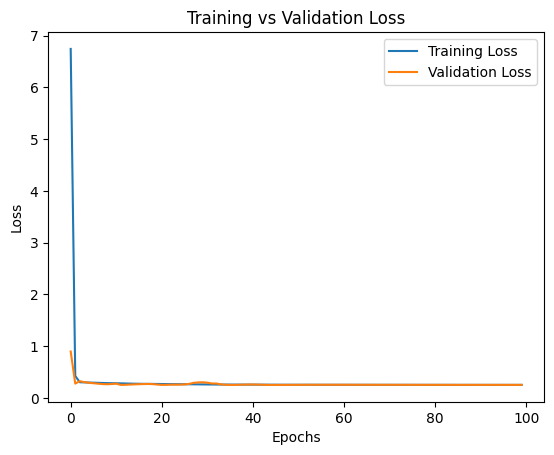

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')  # Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation Loss
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [ ]:
y_pred = model1.predict(X_test)

1895/1895 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:


test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.4003739608877267
Testing MSE: 0.2515137491825042
Testing R²: 0.9124947130642977


creating pickle file

In [ ]:
import pickle
pickle.dump(ridge,open('model.pkl','wb'))

In [ ]:
import pickle

# Save the column names after one-hot encoding
X_ohe_columns = X_ohe.columns.to_list()
pickle.dump(X_ohe_columns, open('X_columns.pkl', 'wb'))

In [ ]:
import numpy as np

# Example input data after One-Hot Encoding
encoded_input = [
    897.077239,  # Rainfall_mm
    27.676966,   # Temperature_Celsius
    0,            # Fertilizer_Used (False -> 0)
    1,            # Irrigation_Used (True -> 1)
    122,          # Days_to_Harvest
    0,            # Region_North (encoded)
    0,            # Region_South (encoded)
    1,            # Region_West (encoded)
    0,            # Soil_Type_Clay (encoded)
    0,            # Soil_Type_Loam (encoded)
    0,            # Soil_Type_Peaty (encoded)
    1,            # Soil_Type_Sandy (encoded)
    0,            # Soil_Type_Silt (encoded)
    1,            # Crop_Cotton (encoded)
    0,            # Crop_Maize (encoded)
    0,            # Crop_Rice (encoded)
    0,            # Crop_Soybean (encoded)
    0,            # Crop_Wheat (encoded)
    0,            # Weather_Condition_Rainy (encoded)
    0             # Weather_Condition_Sunny (encoded)
]

# Convert the input into a 2D NumPy array (1 row, number_of_features columns)
encoded_input = np.array([encoded_input])

# Load the pickled model
model = pickle.load(open('model.pkl', 'rb'))

# Make the prediction
y_pred = model.predict(encoded_input)

# Output the prediction
print("Prediction:", y_pred)


Prediction: [6.25725001]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [2]:
!python --version


Python 3.11.11
